# create a model which predict the price of second hand car


In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.shape

(301, 9)

In [6]:
print(df['Owner'].unique())
print(df['Transmission'].unique())
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())

[0 1 3]
['Manual' 'Automatic']
['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
# car name not important parameter hence remove that
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
#create new features 
# year feature
current_year = 2020
final_dataset['Number_of_Year']= current_year-final_dataset['Year']
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [12]:
final_dataset.drop(['Year'],axis= 1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [13]:
#convert letter into number for better understanding
final_dataset=pd.get_dummies(final_dataset, drop_first =True)# drop_first is True so when three variable present for first we get 0 0 and remaning two has 0 1 and 1 0
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [14]:
final_dataset.corr() #from here we can concude that present price (positive relation), transmission (negative relation)

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


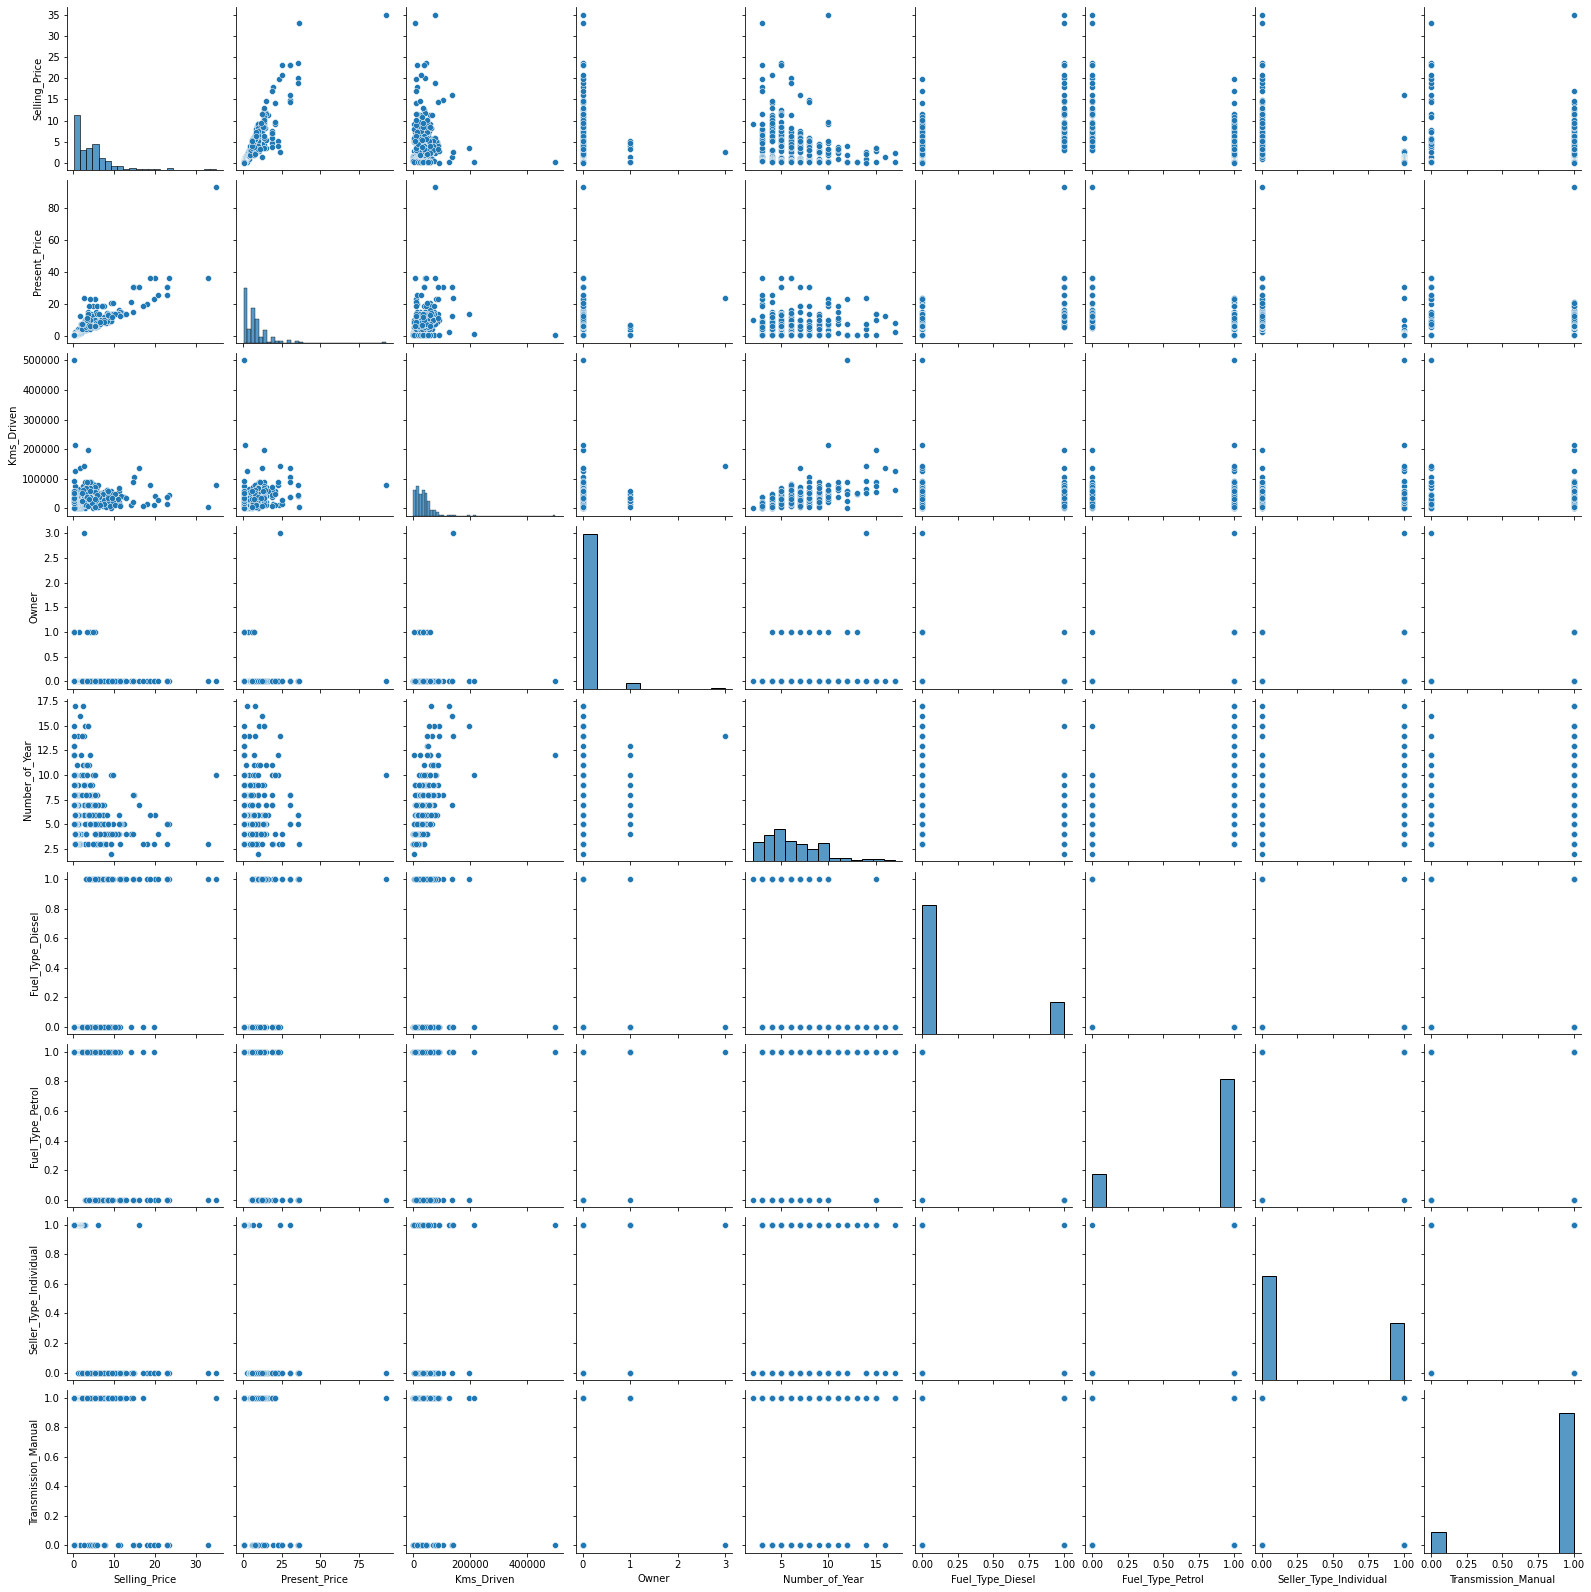

In [27]:
# draw correlation
import seaborn as sns
# sns.pairplot(final_dataset)

In [16]:
# # draw heatmap
import matplotlib.pyplot as plt
%matplotlib inline

# corrmat = final_dataset.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True, cmap="RdYlGn")

In [17]:
#seperate features and label
x= final_dataset.iloc[:,1:] # independent variable
y=final_dataset.iloc[:,0] # dependent variable

In [18]:
x.head()

,Present_Price,Kms_Driven,Owner,Number_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


[3.79173648e-01 3.77108665e-02 3.48160250e-04 7.87720580e-02
 2.27079439e-01 1.50176283e-02 1.22799030e-01 1.39099170e-01]


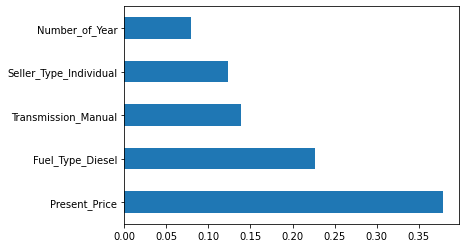

In [19]:
#checking important feature in data 

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

#for visual representation
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')   # get first top 5 feature which impact prices
plt.show()

In [20]:
#train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2)

In [21]:
#model selection and testing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf= RandomForestRegressor()

# HYPER PARAMETER TUNNING
#randomized search CV
'''here we take various paramter and twist them accrofing to our application of randomforest model 
so we can get better control over a model

to check paramter available to twist press shift and tab at model name you get an options'''

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200, num =12)]

#number of feature to be consider at every split
max_features= ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num =6)]

# maximum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [22]:
# create random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [23]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = "neg_mean_squared_error", n_iter =10, cv=5, verbose =2, random_state=42, n_jobs=1)
'''n_jobs tell how many cores you eant to use
negative mean square error method use to check error
verbos use to print result
estimator give model 
'''

'n_jobs tell how many cores you eant to use\nnegative mean square error method use to check error\nverbos use to print result\nestimator give model \n'

In [24]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [25]:
# prediction 
predictions= rf_random.predict(x_test)
predictions

array([ 3.90424485,  7.95414904,  5.29934169,  0.31136486,  5.17770522,
        5.26826636,  0.44825066, 10.26336439,  3.98054488,  5.44781913,
        5.68334343,  7.899052  ,  0.72971754,  7.30939101,  4.63782314,
       19.88353976,  4.6110768 ,  4.98827464,  8.19689288,  0.47127978,
        2.77962489,  2.70000231,  2.70556067,  7.69468693,  2.67041782,
        7.33880538,  0.46376743,  6.98632925,  2.74571907,  4.8944242 ,
        5.34350987, 21.23069542,  0.41998212,  0.33310438,  1.31675152,
        0.26792721, 11.91385071,  0.42435705, 21.57596956,  5.25622861,
        0.60528677,  4.70088196,  1.24337586,  2.86377893,  4.66397077,
        0.43325561,  2.59888764,  7.65468824,  0.4204982 ,  0.32320498,
        9.83522313,  1.11230121,  5.02183774,  1.13901862,  0.42172856,
        5.68535771,  0.41985908,  7.29802903,  5.63910938,  0.54143069,
        1.08014405])

c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

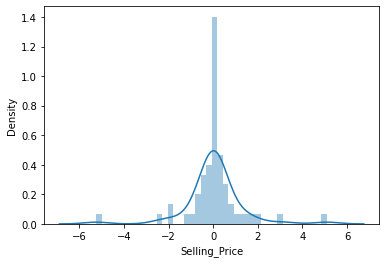

In [29]:
# check result and model performance
sns.distplot(y_test-predictions) #Difference between prediction and actual result near 0 is best performance

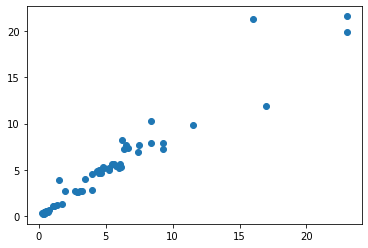

In [30]:
plt.scatter(y_test, predictions) # result showin output near a linear line best model selection

In [31]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [35]:
#export model
import pickle
# open file, where you want to store the data
file = open('car_predict_model.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)